In [45]:
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

df = pd.read_csv("simple-10-200.csv")
data = []
averages = []
overall = []
annotations = []
for i in range(1, len(list(df.columns))):
    trace = go.Scatter(
                    x=df.x,
                    y=df['Series ' + str(i)],
                    name = "Series " + str(i),
                    opacity = 0.8)
    data.append(trace)
    avg = go.Scatter(x=df.x,
                    y=[df['Series ' + str(i)].mean()]*len(df.x),
                    name='Average' + str(i),
                    visible=False,
                    line=dict(dash='dash'))
    annotation = [dict(x=df['Series ' + str(i)].idxmax(),
                       y=df['Series ' + str(i)].max(),
                       xref='x', yref='y',
                       text='max= ' + str(df['Series ' + str(i)].max()) + ' at x = ' + str(df['Series ' + str(i)].idxmax()),
                       ax=0, ay=-40),
                 dict(x=df['Series ' + str(i)].idxmin(),
                       y=df['Series ' + str(i)].min(),
                       xref='x', yref='y',
                       text='min= ' + str(df['Series ' + str(i)].min())+ ' at x = ' + str(df['Series ' + str(i)].idxmin()),
                       ax=0, ay=40),
                 dict(x=list(df.x)[len(list(df.x))-1],
                       y=df['Series ' + str(i)].mean(),
                       xref='x', yref='y',
                       text='Average:<br>'+str(df['Series ' + str(i)].mean()),
                       ax=0, ay=-40)]
    annotations.append(annotation)
    averages.append(avg)
    overall.append(trace)
    overall.append(avg)
    
'''    
high_annotations=[dict(x='2016-03-01',
                       y=df['Series ' + str(i)].mean(),
                       xref='x', yref='y',
                       text='High Average:<br>'+str(df.High.mean()),
                       ax=0, ay=-40),
                  dict(x=df['Series ' + str(i)].idxmax(),
                       y=df['Series ' + str(i)].max(),
                       xref='x', yref='y',
                       text='Series ' + str(i)+str(df['Series ' + str(i)].max()),
                       ax=0, ay=-40)]
'''
    
updatemenus = list([
    dict(active=-1,
         buttons=list([   
            dict(label = 'Series 1',
                 method = 'update',
                 args = [{'visible': [True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]},
                         {'title': 'Series 1',
                          'annotations': annotations[0]}]),
             dict(label = 'Series 2',
                 method = 'update',
                 args = [{'visible': [False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]},
                         {'title': 'Series 2',
                          'annotations': annotations[1]}]),
             dict(label = 'Series 3',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False]},
                         {'title': 'Series 3',
                          'annotations': annotations[2]}]),
             dict(label = 'Series 4',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False]},
                         {'title': 'Series 4',
                          'annotations': annotations[3]}]),
             dict(label = 'Series 5',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False]},
                         {'title': 'Series 5',
                          'annotations': annotations[4]}]),
             dict(label = 'Series 6',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False]},
                         {'title': 'Series 6',
                          'annotations': annotations[5]}]),
             dict(label = 'Series 7',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False]},
                         {'title': 'Series 7',
                          'annotations': annotations[6]}]),
             dict(label = 'Series 8',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False]},
                         {'title': 'Series 8',
                          'annotations': annotations[7]}]),
             dict(label = 'Series 9',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False]},
                         {'title': 'Series 9',
                          'annotations': annotations[8]}]),
             dict(label = 'Series 10',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True]},
                         {'title': 'Series 10',
                          'annotations': annotations[9]}]),
             dict(label = 'All',
                 method = 'update',
                 args = [{'visible': [True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False]},
                         {'title': 'All',
                          'annotations': []}]),
            
        ]),
    )
])
    
    
layout = dict(title='simple-10-200', showlegend=True,
              updatemenus=updatemenus)

fig = dict(data=overall, layout=layout)
py.iplot(fig, filename = "simple-10-200")

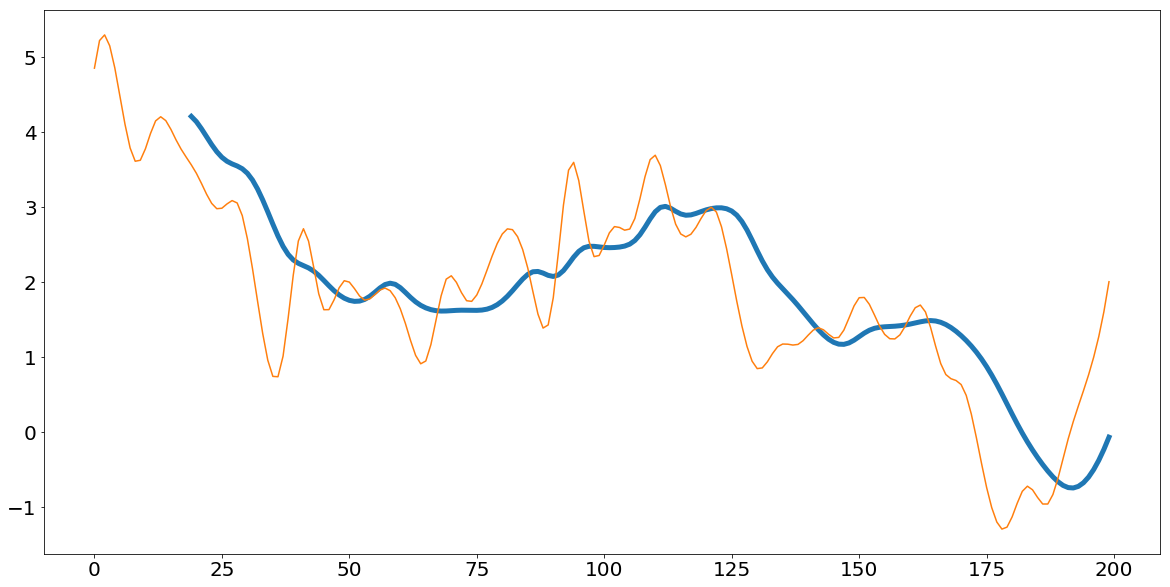

In [139]:
from sklearn.linear_model import Lasso
i = 2
df['Series ' + str(i)].rolling(20).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
X = df.x.values
y = df['Series ' + str(i)].values
plt.plot(y)
plt.show()